# Importing libraries and previous functions

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import sys
IMG_PATH = '../imgs/' 

# 1. The Fuzzy Scanner

## 1.1

In [2]:
def degradation_fn(img,a,b,T):
    # converting to freq domain
    img3 = np.fft.fftshift(np.fft.fft2((img)))
    for u in range(img3.shape[0]):
        for v in range(img3.shape[1]):
            sum_prod = ((u-img3.shape[0]/2)*a+(v-img3.shape[1]/2)*b)
            img3[u][v] = img3[u][v]*(T*np.exp(-1j*math.pi*sum_prod)*np.sinc(sum_prod))
    # Shifting back
    img4 = np.fft.ifftshift(img3)
    out = np.abs(np.fft.ifft2(img4))
    # interpolating to values between 0-255
    out = np.rint(np.interp(out, (out.min(), out.max()), (0, 255)))
    return out

## 1.2

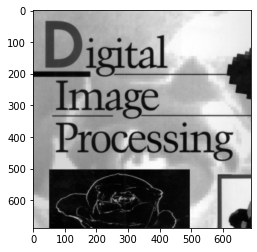

In [3]:
book = cv2.imread(IMG_PATH+'book.jpg')
book = cv2.cvtColor(book,cv2.COLOR_BGR2GRAY)
plt.imshow(book,cmap="gray")
plt.show()

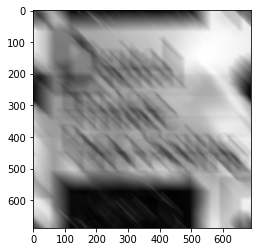

In [4]:
a = 0.1
b = 0.1
T = 1
blurry_book = degradation_fn(book,a,b,T)
plt.imshow(blurry_book,cmap="gray")
plt.show()

## 1.3

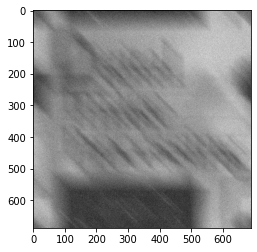

In [5]:
noise = np.random.normal(0,np.sqrt(650),[book.shape[0],book.shape[1]])
# 0 is the mean of the normal distribution you are choosing from
# 650 is the standard deviation of the normal distribution
noisy_book = blurry_book+noise
noisy_book = np.rint(np.interp(noisy_book, (noisy_book.min(), noisy_book.max()), (0, 255)))
plt.imshow(noisy_book,cmap="gray")
plt.show()

## 1.4

In [6]:
def inverse_filter(img,a,b,T):
    # converting to freq domain
    img3 = np.fft.fftshift(np.fft.fft2(img))
    for u in range(img3.shape[0]):
        for v in range(img3.shape[1]):
            sum_prod = ((u-img3.shape[0]/2)*a+(v-img3.shape[1]/2)*b)
            H = (T*np.exp(-1j*math.pi*sum_prod)*np.sinc(sum_prod))
            thresh = 0.0001
            if abs(H) > thresh:
                img3[u][v] = img3[u][v]/H
    # Shifting back
    img4 = np.fft.ifftshift(img3)
    out = abs(np.fft.ifft2(img4))
    # interpolating to values between 0-255
    out = np.rint(np.interp(out, (out.min(), out.max()), (0, 255)))
    return out

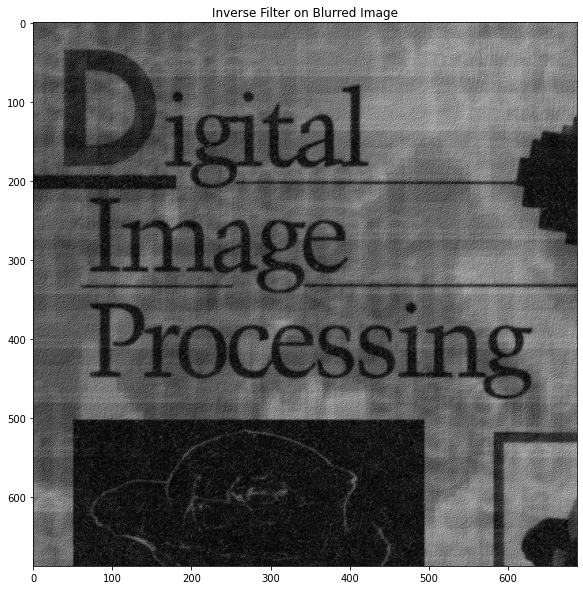

In [7]:
filtered = inverse_filter(blurry_book,0.1,0.1,1)
fig = plt.figure(figsize=(10,10))
plt.imshow(filtered,cmap="gray")
plt.title("Inverse Filter on Blurred Image")
plt.show()

## 1.5

In [8]:
def wiener_deconv_filter(img,a,b,T,k):
    # converting to freq domain
    img3 = np.fft.fftshift(np.fft.fft2(img))
    for u in range(img3.shape[0]):
        for v in range(img3.shape[1]):
            sum_prod = ((u-img3.shape[0]/2)*a+(v-img3.shape[1]/2)*b)
            H = (T*np.exp(-1j*math.pi*sum_prod)*np.sinc(sum_prod))
            img3[u][v] = img3[u][v]*np.conj(H)/(k+np.abs(H)**2)
    # Shifting back
    img4 = np.fft.ifftshift(img3)
    out = abs(np.fft.ifft2(img4))
    # interpolating to values between 0-255
    out = np.rint(np.interp(out, (out.min(), out.max()), (0, 255)))
    return out

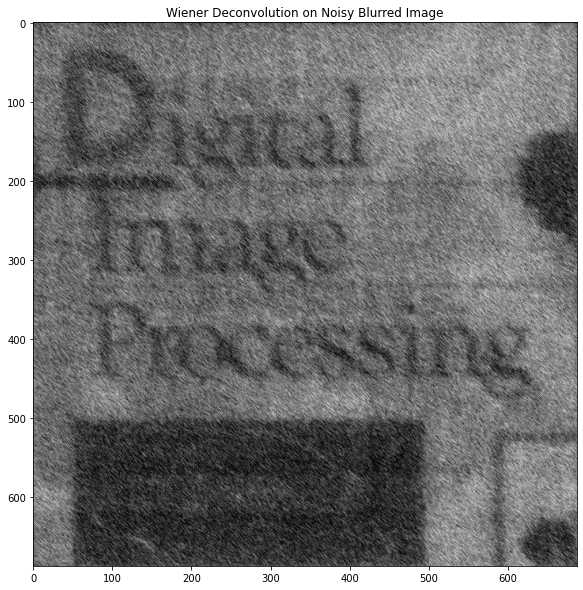

In [9]:
T = 1
a = 0.1
b = 0.1
# out1 = wiener_deconv_filter(noisy_book,a,b,T,0.001)
# out1 = wiener_deconv_filter(noisy_book,a,b,T,0.005)
out1 = wiener_deconv_filter(noisy_book,a,b,T,0.0075)                # best
# out1 = wiener_deconv_filter(noisy_book,a,b,T,0.01)
fir = plt.figure(figsize=[10,10])
plt.imshow(out1,cmap="gray")
plt.title("Wiener Deconvolution on Noisy Blurred Image")
plt.show()

## 1.6

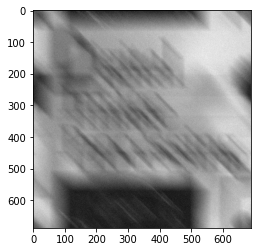

In [10]:
noise = np.random.normal(0,10,[book.shape[0],book.shape[1]])
# 0 is the mean of the normal distribution you are choosing from
# 10 is the variance of the normal distribution
noisy_book1 = blurry_book+noise
noisy_book1 = np.rint(np.interp(noisy_book1, (noisy_book1.min(), noisy_book1.max()), (0, 255)))
plt.imshow(noisy_book1,cmap="gray")
plt.show()

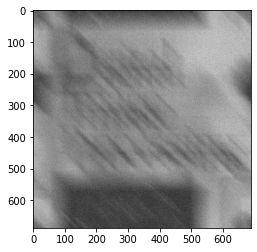

In [11]:
noise = np.random.normal(0,30,[book.shape[0],book.shape[1]])
# 0 is the mean of the normal distribution you are choosing from
# 30 is the variance of the normal distribution
noisy_book2 = blurry_book+noise
noisy_book2 = np.rint(np.interp(noisy_book2, (noisy_book2.min(), noisy_book2.max()), (0, 255)))
plt.imshow(noisy_book2,cmap="gray")
plt.show()

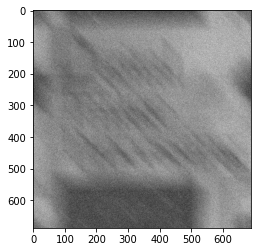

In [12]:
noise = np.random.normal(0,50,[book.shape[0],book.shape[1]])
# 0 is the mean of the normal distribution you are choosing from
# 50 is the variance of the normal distribution
noisy_book3 = blurry_book+noise
noisy_book3 = np.rint(np.interp(noisy_book3, (noisy_book3.min(), noisy_book3.max()), (0, 255)))
plt.imshow(noisy_book3,cmap="gray")
plt.show()

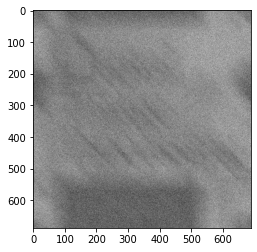

In [13]:
noise = np.random.normal(0,100,[book.shape[0],book.shape[1]])
# 0 is the mean of the normal distribution you are choosing from
# 100 is the variance of the normal distribution
noisy_book4 = blurry_book+noise
noisy_book4 = np.rint(np.interp(noisy_book4, (noisy_book4.min(), noisy_book4.max()), (0, 255)))
plt.imshow(noisy_book4,cmap="gray")
plt.show()

In [14]:
out1 = wiener_deconv_filter(noisy_book1,a,b,T,0.0075) 
out2 = wiener_deconv_filter(noisy_book2,a,b,T,0.0075) 
out3 = wiener_deconv_filter(noisy_book3,a,b,T,0.0075) 
out4 = wiener_deconv_filter(noisy_book4,a,b,T,0.0075) 

Text(0.5, 1.0, 'variance = 100')

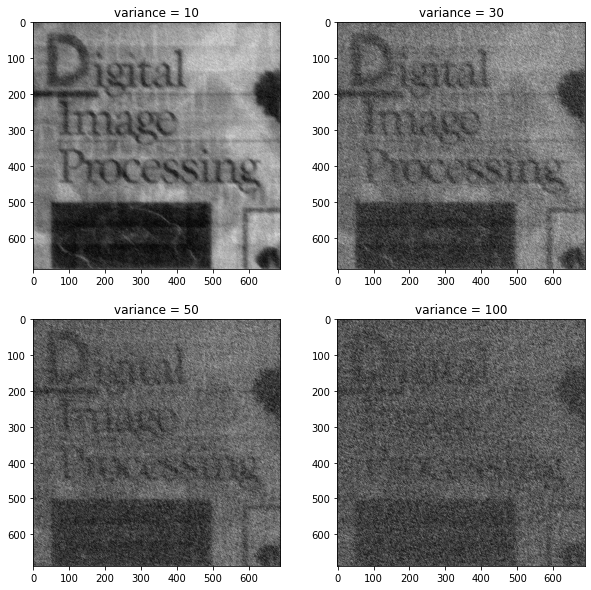

In [15]:
fig = plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(out1,cmap="gray")
plt.title("variance = 10")
plt.subplot(2,2,2)
plt.imshow(out2,cmap="gray")
plt.title("variance = 30")
plt.subplot(2,2,3)
plt.imshow(out3,cmap="gray")
plt.title("variance = 50")
plt.subplot(2,2,4)
plt.imshow(out4,cmap="gray")
plt.title("variance = 100")

We can observe that performance of wiener filter degrades as we increase variance of noise.

# Answer 2
## 2.1

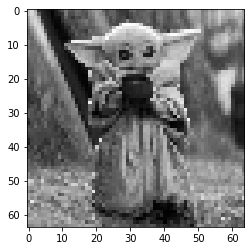

In [16]:
test2 = cv2.imread(IMG_PATH+'test2.jpeg')
test2 = cv2.cvtColor(test2,cv2.COLOR_BGR2GRAY)
test2 = cv2.resize(test2,(64,64))
plt.imshow(test2,cmap="gray")
plt.show()

In [17]:
def get_frequencies(img):
    # Calculate frequencies
    (h,w) = img.shape
    freq = {}
    for i in range(h):
        for j in range(w):
            val = img[i,j]
            if (val in freq.keys()):
                freq[val] += 1
            else:
                freq[val] = 1
    # print(freq)
    # sort the frequencies
    freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
    # print(freq)
    return freq

In [18]:
def huffman_tree(freq):
    # Create a leaf node for each symbol
    nodes = freq
    while len(nodes) > 1:
        # Sort the nodes by frequency
        nodes = sorted(nodes, key=lambda x: x[1])
        # Get the 2 nodes with the lowest frequency
        (key1, c1) = nodes[0]
        (key2, c2) = nodes[1]
        # Create a new internal node with children and frequency equal to the sum of the 2 nodes frequencies
        nodes = nodes[2:]
        node = (key1, key2)
        nodes.append((node, c1 + c2))
    # Return the root node
    return nodes[0][0]

In [19]:
def encode_tree(tree,img):
    
# Assign codes (0/1) to the characters
    def assign_code(node, pat=''):
        if type(node) is tuple:
            assign_code(node[0], pat + "0")
            assign_code(node[1], pat + "1")
        else:
            codes[node] = pat
    codes = {}
    assign_code(tree)
    # print(codes)

# Encode the tree
# Assigning the codewords to the nodes

    encoded = ""
    (h,w) = img.shape
    for i in range(h):
        for j in range(w):
            val = img[i,j]
            encoded += codes[val]

    return encoded,codes

In [20]:
def huffman_coding(img):

# Get the frequencies of the symbols in the img
    freq = get_frequencies(img)

# Build the Huffman Tree
    tree = huffman_tree(freq)
    # print(tree)
    
# Encode the tree
    encoded,codes = encode_tree(tree,img)
    # print(encoded)
    # print(len(encoded))

    return encoded, codes

In [21]:
# data = "This is a test string for Huffman coding"
data = test2
encoded, codes = huffman_coding(data)
print("Encoded string:", encoded)
# print(codes)

Encoded string: 111000100011111010111011001100011100110110001100100100011101101100101100100001011110001110110100011101101000000110110000101101101100101010001001111011010110110011011010010111000111100110001101101010111111111010011111010011011000111010001100000010101101110110110010101000001101011101110111011011101101101001000111101100110101000110000110111011000001010000101010000111001011110010111000011111110111111110011111101110010110010000101101110001100110011110101011000010000100001100100001001000101111101011111000100111011100110100010111000001011000111101100110111010110010011101100000011100000011110110000111100010010111101111101010011110000001110010011101111011000100001111011001101111011111101111011000100100010101100100011100010011011101100000011101000110111000100100011001010001011011100111111100100111011001001001110100011101110101110111000000001010011110110100010000010101001100111100011110111011111111111010000100100010010100110001010111111100110111011010111100100101110001010100111110

In [22]:
initial_size = sys.getsizeof(test2)
compressed_size = sys.getsizeof(int(encoded, base=2))
print("Initial size:", initial_size)
print("Compressed size:", compressed_size)
compression_ratio = compressed_size/initial_size
print("Compression ratio:", compression_ratio)

Initial size: 4224
Compressed size: 4192
Compression ratio: 0.9924242424242424


In [23]:
def huffman_decoding(data,tree):
    current = ""
    result = []
    for node in data:
        # taking the encoded string till current is found in the tree
        current = current + node
        # print(current)
        if current in tree.values():
            for key, value in tree.items():
                if current == value:
                    # print(key)
                    result = np.append(result,key)
                    # print(result)
                    current = ""
    return result.astype(int)

In [24]:
decoded = huffman_decoding(encoded, codes)
print("Decoded string:", decoded)

Decoded string: [193 214 171 ...  78 113 101]


In [25]:
np.array_equal(decoded,test2.flatten())

True

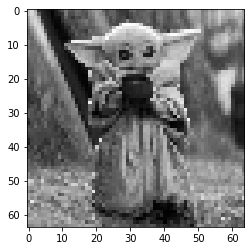

In [26]:
recovered = np.reshape(decoded,(test2.shape))
plt.imshow(recovered,cmap="gray")
plt.show()

## 2.2

In [59]:
def lzw_coding(img):

# Getting list of image pixels
    pix_vals = list(img.flatten())
    # print(pix_vals)

# Initialize dictionary
    len_dict = 256
    dictionary = {str(i): i for i in range(len_dict)}
    # print(dictionary)

# Initialize variables
    w = str(pix_vals[0])
    result = []

# Encoding
    for i in range(len(pix_vals)-1):
        c = str(pix_vals[i+1])
        curr_str = w + c
        # print(curr_str)
        if curr_str in dictionary:
            w = curr_str
        else:
            result.append(dictionary[w])
            dictionary[curr_str] = len_dict
            len_dict += 1
            w = c
        
    result.append(dictionary[w])
    # print(result)

    return result

In [60]:
# data = "This is a test string for LZW coding"
data = test2
encoded = lzw_coding(data)
print("Encoded string:", encoded)

Encoded string: [193, 214, 171, 52, 37, 27, 17, 10, 28, 61, 82, 121, 89, 84, 109, 107, 86, 95, 125, 145, 154, 150, 105, 78, 99, 97, 67, 59, 59, 58, 95, 106, 85, 92, 93, 110, 101, 82, 107, 107, 100, 88, 111, 121, 122, 92, 103, 152, 176, 166, 166, 124, 134, 167, 149, 166, 199, 184, 169, 173, 178, 209, 199, 157, 190, 213, 188, 95, 41, 30, 225, 27, 37, 52, 119, 75, 78, 102, 98, 90, 78, 119, 133, 159, 138, 125, 83, 98, 98, 75, 63, 62, 52, 73, 92, 84, 95, 105, 100, 86, 68, 105, 116, 96, 86, 96, 121, 118, 82, 106, 146, 174, 168, 164, 127, 144, 177, 160, 176, 204, 186, 164, 167, 177, 198, 182, 164, 165, 199, 201, 167, 42, 38, 27, 9, 17, 16, 53, 98, 69, 52, 79, 70, 95, 81, 110, 121, 155, 150, 144, 101, 77, 98, 76, 67, 73, 45, 66, 86, 91, 89, 102, 103, 80, 67, 114, 300, 73, 90, 115, 113, 90, 98, 129, 159, 155, 160, 130, 137, 174, 158, 171, 201, 170, 167, 159, 163, 176, 170, 158, 150, 196, 212, 188, 67, 37, 31, 13, 10, 10, 45, 71, 77, 73, 81, 96, 108, 122, 97, 110, 141, 153, 147, 116, 74, 87, 68,

In [56]:
initial_size = sys.getsizeof(test2)
compressed_size = len(encoded)
print("Initial size:", initial_size)
print("Compressed size:", compressed_size)
compression_ratio = compressed_size/initial_size
print("Compression ratio:", compression_ratio)

Initial size: 4224
Compressed size: 3673
Compression ratio: 0.8695549242424242


In [52]:
def lzw_decoding(data):

# Initialize dictionary
    len_dict = 256
    dictionary = {i: str(i) for i in range(len_dict)}
    # print(dictionary)

# Initialize variables
    result = []
    w = data[0]
    result = dictionary[w]
    curr = ""
    curr += result
    print("Decoded string:", end=" ")
    print(result, end=", ")

# decode data
    for i in range(len(data)-1):
        k = data[i+1]
        if k in dictionary:
            result = dictionary[k]
        else:
            result = (dictionary[w])
            result = (result) + (curr)
    
        print(result, end=", ")
        curr = " "
        curr += result.split(", ")[0]
        
        dictionary[len_dict] = str(w) + str(curr)
        len_dict += 1

        w = k
    
    return

In [53]:
lzw_decoding(encoded)


Decoded string: 193, 214, 171, 52, 37, 27, 17, 10, 28, 61, 82, 121, 89, 84, 109, 107, 86, 95, 125, 145, 154, 150, 105, 78, 99, 97, 67, 59, 59, 58, 95, 106, 85, 92, 93, 110, 101, 82, 107, 107, 100, 88, 111, 121, 122, 92, 103, 152, 176, 166, 166, 124, 134, 167, 149, 166, 199, 184, 169, 173, 178, 209, 199, 157, 190, 213, 188, 95, 41, 30, 225, 27, 37, 52, 119, 75, 78, 102, 98, 90, 78, 119, 133, 159, 138, 125, 83, 98, 98, 75, 63, 62, 52, 73, 92, 84, 95, 105, 100, 86, 68, 105, 116, 96, 86, 96, 121, 118, 82, 106, 146, 174, 168, 164, 127, 144, 177, 160, 176, 204, 186, 164, 167, 177, 198, 182, 164, 165, 199, 201, 167, 42, 38, 27, 9, 17, 16, 53, 98, 69, 52, 79, 70, 95, 81, 110, 121, 155, 150, 144, 101, 77, 98, 76, 67, 73, 45, 66, 86, 91, 89, 102, 103, 80, 67, 114, 122 92, 73, 90, 115, 113, 90, 98, 129, 159, 155, 160, 130, 137, 174, 158, 171, 201, 170, 167, 159, 163, 176, 170, 158, 150, 196, 212, 188, 67, 37, 31, 13, 10, 10, 45, 71, 77, 73, 81, 96, 108, 122, 97, 110, 141, 153, 147, 116, 74, 87, 6

## 2.3

In [32]:
def RLE_coding(img):
    w,h = img.shape
    data = list(img.flatten())
    result = []
    count = 1
    for i in range(len(data)-1):
        if data[i] == data[i+1]:
            count += 1
        else:
            result.append((data[i],count))
            count = 1
    result.append((data[i+1],count))
    return result

In [33]:
# data = "dddddhghhhhhhhkkkkk"
data = test2
encoded = RLE_coding(data)
print("Encoded string:", encoded)

Encoded string: [(193, 1), (214, 1), (171, 1), (52, 1), (37, 1), (27, 1), (17, 1), (10, 1), (28, 1), (61, 1), (82, 1), (121, 1), (89, 1), (84, 1), (109, 1), (107, 1), (86, 1), (95, 1), (125, 1), (145, 1), (154, 1), (150, 1), (105, 1), (78, 1), (99, 1), (97, 1), (67, 1), (59, 2), (58, 1), (95, 1), (106, 1), (85, 1), (92, 1), (93, 1), (110, 1), (101, 1), (82, 1), (107, 2), (100, 1), (88, 1), (111, 1), (121, 1), (122, 1), (92, 1), (103, 1), (152, 1), (176, 1), (166, 2), (124, 1), (134, 1), (167, 1), (149, 1), (166, 1), (199, 1), (184, 1), (169, 1), (173, 1), (178, 1), (209, 1), (199, 1), (157, 1), (190, 1), (213, 1), (188, 1), (95, 1), (41, 1), (30, 1), (22, 1), (5, 1), (27, 1), (37, 1), (52, 1), (119, 1), (75, 1), (78, 1), (102, 1), (98, 1), (90, 1), (78, 1), (119, 1), (133, 1), (159, 1), (138, 1), (125, 1), (83, 1), (98, 2), (75, 1), (63, 1), (62, 1), (52, 1), (73, 1), (92, 1), (84, 1), (95, 1), (105, 1), (100, 1), (86, 1), (68, 1), (105, 1), (116, 1), (96, 1), (86, 1), (96, 1), (121, 1

In [34]:
initial_size = sys.getsizeof(test2)
compressed_size = len(encoded)*2
print("Initial size:", initial_size)
print("Compressed size:", compressed_size)
compression_ratio = compressed_size/initial_size
print("Compression ratio:", compression_ratio)

Initial size: 4224
Compressed size: 8026
Compression ratio: 1.900094696969697


In [35]:
def RLE_decoding(data):
    result = ""
    print("Decoded string:", end=" ")
    for i in range(len(data)):
        result = data[i][0]*data[i][1]
        print(result, end=" ")
    return

In [36]:
RLE_decoding(encoded)

Decoded string: 193 214 171 52 37 27 17 10 28 61 82 121 89 84 109 107 86 95 125 145 154 150 105 78 99 97 67 118 58 95 106 85 92 93 110 101 82 214 100 88 111 121 122 92 103 152 176 332 124 134 167 149 166 199 184 169 173 178 209 199 157 190 213 188 95 41 30 22 5 27 37 52 119 75 78 102 98 90 78 119 133 159 138 125 83 196 75 63 62 52 73 92 84 95 105 100 86 68 105 116 96 86 96 121 118 82 106 146 174 168 164 127 144 177 160 176 204 186 164 167 177 198 182 164 165 199 201 167 42 38 27 9 17 16 53 98 69 52 79 70 95 81 110 121 155 150 144 101 77 98 76 67 73 45 66 86 91 89 102 103 80 67 114 122 92 73 90 115 113 90 98 129 159 155 160 130 137 174 158 171 201 170 167 159 163 176 170 158 150 196 212 188 67 37 31 13 20 45 71 77 73 81 96 108 122 97 110 141 153 147 116 74 87 68 73 81 132 86 80 97 95 94 109 87 65 99 115 89 82 87 108 126 106 83 103 141 154 155 127 138 166 143 159 191 154 145 120 129 147 175 136 138 183 213 204 129 42 34 21 6 10 23 56 66 77 64 86 95 110 95 111 136 153 152 133 84 75 72 179

## 2.4

In [37]:
def dctTransform(data):
    result = np.zeros(data.shape)
    m,n = data.shape
    for i in range(m):
        if i == 0:
            ci = np.sqrt(1/m)
        else:
            ci = np.sqrt(2/m)

        for j in range(n):
            sum = 0
            if j == 0:
                cj = np.sqrt(1/n)
            else:
                cj = np.sqrt(2/n)
            for x in range(m):
                for y in range(n):
                    sum += data[x,y] * np.cos(((2*x+1)*i*np.pi)/(2*m)) * np.cos(((2*y+1)*j*np.pi)/(2*n))
            result[i,j] = ci*cj*sum
    return result


In [38]:
# data = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
data = test2
encoded = dctTransform(data)
print(encoded)

[[ 7.03793750e+03 -5.44791007e+02  1.68780814e+02 ...  2.34640526e-01
   2.91746900e+01 -3.13536764e+00]
 [ 8.83172078e+01 -3.94194120e+02 -5.88831856e+02 ... -3.23578842e+00
  -2.76769756e+01  3.22998870e+01]
 [ 8.02704940e+02  1.13804222e+02  4.08296489e+02 ...  1.44412961e+01
  -1.60111249e+01 -2.45388088e+01]
 ...
 [-1.50869472e+00 -7.00842543e+00  3.35298674e+00 ... -1.19624926e+01
  -1.55974428e+01  2.03836144e+01]
 [-4.44227621e+00 -1.94655037e+01 -9.27712459e+00 ... -1.76899910e+01
  -9.77014252e+00  2.68628664e+01]
 [ 2.35174717e+01 -7.44632878e-01 -1.66599747e+00 ... -1.54978597e+01
  -1.53212598e+01  1.41612471e-01]]


In [39]:
initial_size = sys.getsizeof(test2)
compressed_size = sys.getsizeof(encoded)
print("Initial size:", initial_size)
print("Compressed size:", compressed_size)
compression_ratio = compressed_size/initial_size
print("Compression ratio:", compression_ratio)

Initial size: 4224
Compressed size: 32896
Compression ratio: 7.787878787878788


In [40]:
def dct_inverse(encoded):
    decoded = np.zeros(encoded.shape)
    m,n = encoded.shape
    for i in range(m):
        for j in range(n):
            sum = 0
            for x in range(m):
                for y in range(n):
                    if x == 0:
                        ci = np.sqrt(1/m)
                    else:
                        ci = np.sqrt(2/m)
                    if y == 0:
                        cj = np.sqrt(1/n)
                    else:
                        cj = np.sqrt(2/n)
                    sum += ci*cj*encoded[x,y] * np.cos(((2*i+1)*x*np.pi)/(2*m)) * np.cos(((2*j+1)*y*np.pi)/(2*n))
            decoded[i,j] = sum
    return decoded.astype(int)

In [41]:
decoded = dct_inverse(encoded)
print(decoded)

[[193 213 171 ... 209 199 156]
 [189 212 187 ... 198 181 163]
 [164 198 200 ... 175 170 157]
 ...
 [172 172 155 ...  67  92 124]
 [156 154 158 ...  85  97  94]
 [128 133 147 ...  77 112 100]]


In [42]:
np.array_equal(decoded,test2.flatten())

False

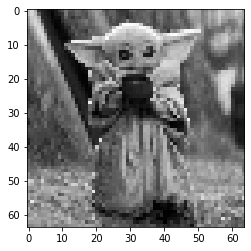

In [43]:
recovered = np.reshape(decoded,(test2.shape))
plt.imshow(recovered,cmap="gray")
plt.show()

While Huffman Coding, LZW and RLE show lossless compression, DCT Transform shows lossy compression. For the image chosen, best compression is given by LZW compression and worst is given by DCT Transform.